# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [59]:
import kagglehub

# Download latest version
data_source_location = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", data_source_location)

Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
Path to dataset files: /kaggle/input/hotel-booking-demand


In [60]:
import os
import pandas as pd

if os.path.isdir(data_source_location):
  print(True)

source_files = os.listdir(data_source_location)
main_data_file_path = data_source_location + "/" + source_files[0]

booking_data_frame = pd.read_csv(main_data_file_path)

True


## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

Dataset Shape: (119390, 32)

ANALYSIS OF lead_time

Summary Statistics for lead_time:
count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

Skewness: 1.3465
Kurtosis: 1.6964
IQR: 142.00

Outliers (IQR method): 3005 (2.52%)

ANALYSIS OF adr

Summary Statistics for adr:
count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Skewness: 10.5302
Kurtosis: 1013.1899
IQR: 56.71

Outliers (IQR method): 3793 (3.18%)


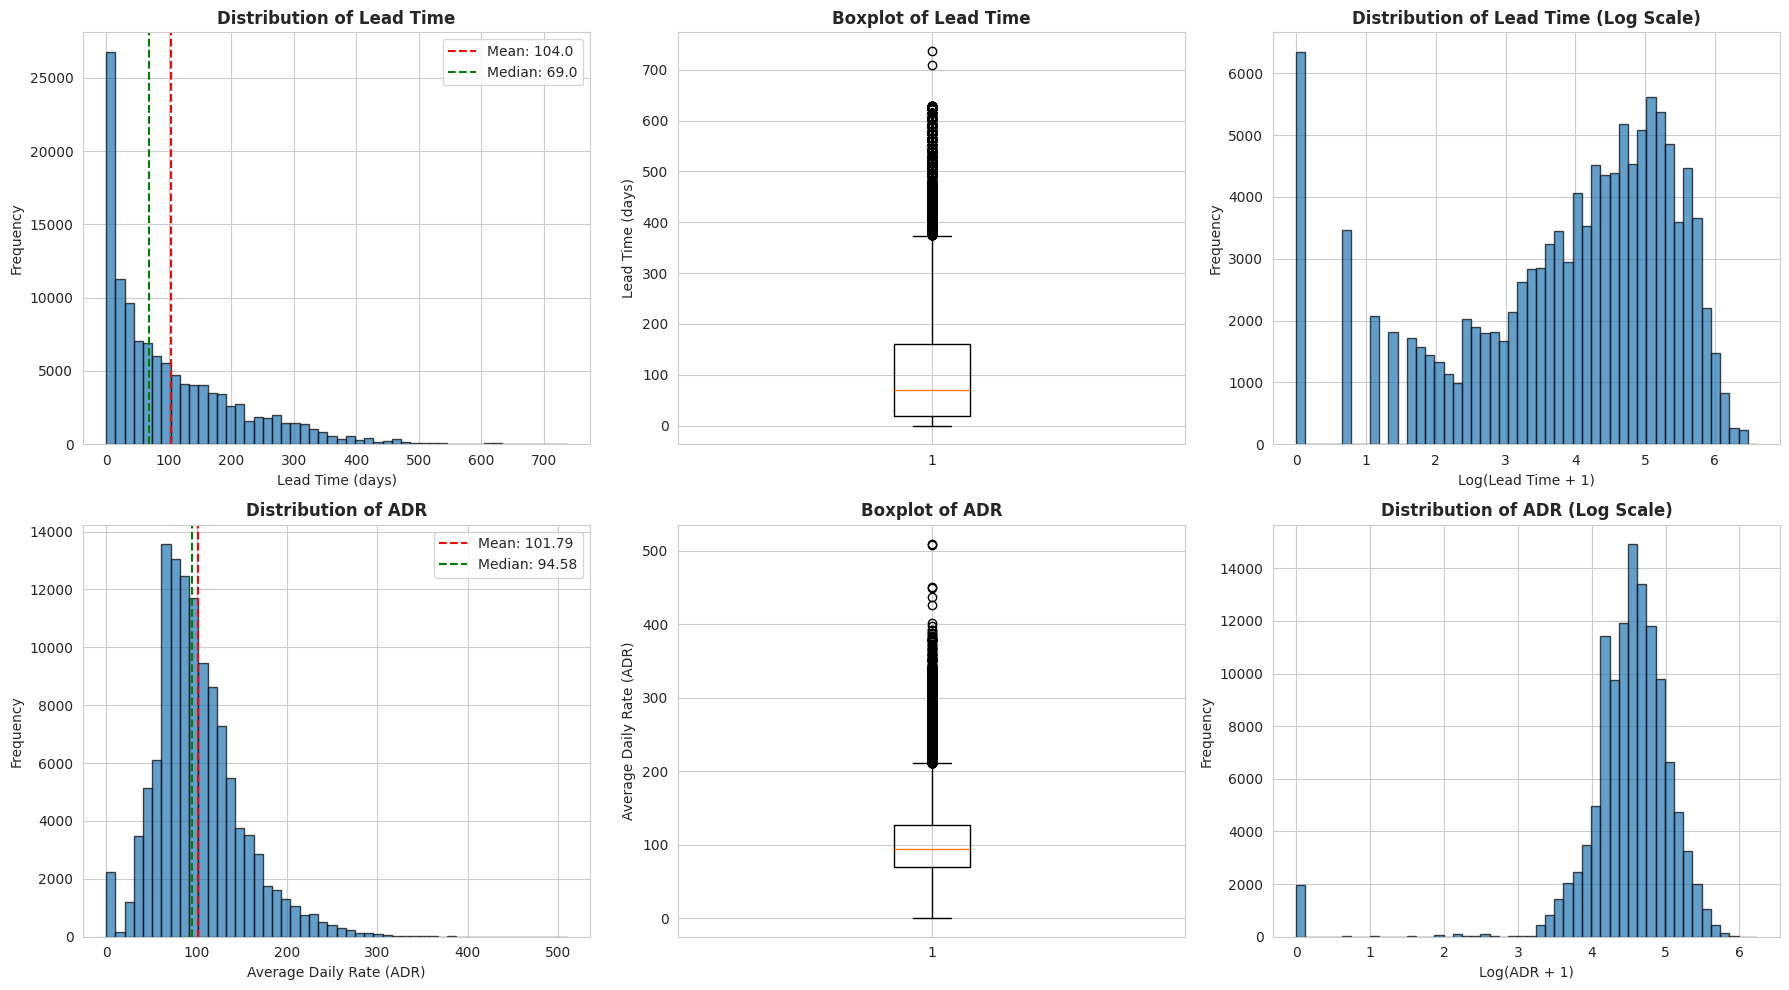

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

print("Dataset Shape:", booking_data_frame.shape)
print("\n" + "="*50)
print("ANALYSIS OF lead_time")
print("="*50)

print("\nSummary Statistics for lead_time:")
print(booking_data_frame['lead_time'].describe())

print(f"\nSkewness: {booking_data_frame['lead_time'].skew():.4f}")
print(f"Kurtosis: {booking_data_frame['lead_time'].kurtosis():.4f}")
print(f"IQR: {booking_data_frame['lead_time'].quantile(0.75) - booking_data_frame['lead_time'].quantile(0.25):.2f}")

first_quartile_lead_time = booking_data_frame['lead_time'].quantile(0.25)
third_quartile_lead_time = booking_data_frame['lead_time'].quantile(0.75)
iqr_lead_time_range = third_quartile_lead_time - first_quartile_lead_time
lead_time_lower_threshold = first_quartile_lead_time - 1.5 * iqr_lead_time_range
lead_time_upper_threshold = third_quartile_lead_time + 1.5 * iqr_lead_time_range
lead_time_outlier_data = booking_data_frame[(booking_data_frame['lead_time'] < lead_time_lower_threshold) | (booking_data_frame['lead_time'] > lead_time_upper_threshold)]
print(f"\nOutliers (IQR method): {len(lead_time_outlier_data)} ({len(lead_time_outlier_data)/len(booking_data_frame)*100:.2f}%)")

print("\n" + "="*50)
print("ANALYSIS OF adr")
print("="*50)

print("\nSummary Statistics for adr:")
print(booking_data_frame['adr'].describe())

print(f"\nSkewness: {booking_data_frame['adr'].skew():.4f}")
print(f"Kurtosis: {booking_data_frame['adr'].kurtosis():.4f}")
print(f"IQR: {booking_data_frame['adr'].quantile(0.75) - booking_data_frame['adr'].quantile(0.25):.2f}")

first_quartile_adr = booking_data_frame['adr'].quantile(0.25)
third_quartile_adr = booking_data_frame['adr'].quantile(0.75)
iqr_adr_range = third_quartile_adr - first_quartile_adr
adr_lower_threshold = first_quartile_adr - 1.5 * iqr_adr_range
adr_upper_threshold = third_quartile_adr + 1.5 * iqr_adr_range
adr_outlier_data = booking_data_frame[(booking_data_frame['adr'] < adr_lower_threshold) | (booking_data_frame['adr'] > adr_upper_threshold)]
print(f"\nOutliers (IQR method): {len(adr_outlier_data)} ({len(adr_outlier_data)/len(booking_data_frame)*100:.2f}%)")

filtered_adr_records = booking_data_frame[(booking_data_frame['adr'] >= 0) & (booking_data_frame['adr'] <= 1000)].copy()

plot_figure, plot_axes = plt.subplots(2, 3, figsize=(18, 10))

plot_axes[0, 0].hist(booking_data_frame['lead_time'], bins=50, edgecolor='black', alpha=0.7)
plot_axes[0, 0].set_title('Distribution of Lead Time', fontsize=12, fontweight='bold')
plot_axes[0, 0].set_xlabel('Lead Time (days)')
plot_axes[0, 0].set_ylabel('Frequency')
plot_axes[0, 0].axvline(booking_data_frame['lead_time'].mean(), color='red', linestyle='--', label=f'Mean: {booking_data_frame["lead_time"].mean():.1f}')
plot_axes[0, 0].axvline(booking_data_frame['lead_time'].median(), color='green', linestyle='--', label=f'Median: {booking_data_frame["lead_time"].median():.1f}')
plot_axes[0, 0].legend()

plot_axes[0, 1].boxplot(booking_data_frame['lead_time'], vert=True)
plot_axes[0, 1].set_title('Boxplot of Lead Time', fontsize=12, fontweight='bold')
plot_axes[0, 1].set_ylabel('Lead Time (days)')

plot_axes[0, 2].hist(np.log1p(booking_data_frame['lead_time']), bins=50, edgecolor='black', alpha=0.7)
plot_axes[0, 2].set_title('Distribution of Lead Time (Log Scale)', fontsize=12, fontweight='bold')
plot_axes[0, 2].set_xlabel('Log(Lead Time + 1)')
plot_axes[0, 2].set_ylabel('Frequency')

plot_axes[1, 0].hist(filtered_adr_records['adr'], bins=50, edgecolor='black', alpha=0.7)
plot_axes[1, 0].set_title('Distribution of ADR', fontsize=12, fontweight='bold')
plot_axes[1, 0].set_xlabel('Average Daily Rate (ADR)')
plot_axes[1, 0].set_ylabel('Frequency')
plot_axes[1, 0].axvline(filtered_adr_records['adr'].mean(), color='red', linestyle='--', label=f'Mean: {filtered_adr_records["adr"].mean():.2f}')
plot_axes[1, 0].axvline(filtered_adr_records['adr'].median(), color='green', linestyle='--', label=f'Median: {filtered_adr_records["adr"].median():.2f}')
plot_axes[1, 0].legend()

plot_axes[1, 1].boxplot(filtered_adr_records['adr'], vert=True)
plot_axes[1, 1].set_title('Boxplot of ADR', fontsize=12, fontweight='bold')
plot_axes[1, 1].set_ylabel('Average Daily Rate (ADR)')

plot_axes[1, 2].hist(np.log1p(filtered_adr_records['adr']), bins=50, edgecolor='black', alpha=0.7)
plot_axes[1, 2].set_title('Distribution of ADR (Log Scale)', fontsize=12, fontweight='bold')
plot_axes[1, 2].set_xlabel('Log(ADR + 1)')
plot_axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [62]:
print("DIAGNOSIS")
print("\nLEAD TIME:")
print(f"My analysis of `lead_time` reveals a right-skewed distribution, with a skewness of {booking_data_frame['lead_time'].skew():.2f}. The median booking lead time is {booking_data_frame['lead_time'].median():.1f} days, significantly lower than the mean of {booking_data_frame['lead_time'].mean():.1f} days. This suggests that while a majority of guests book closer to their arrival date, a notable portion makes reservations far in advance (exceeding {booking_data_frame['lead_time'].quantile(0.95):.0f} days). This longer lead time could be attributed to planning for specific events or securing early bird rates.")

print("\nADR:")
print(f"Similarly, the `adr` distribution is highly right-skewed, indicated by a skewness of {booking_data_frame['adr'].skew():.4f}. The average daily rate shows a median of ${filtered_adr_records['adr'].median():.2f}, while the mean is higher at ${filtered_adr_records['adr'].mean():.2f}. This disparity points to the presence of a few exceptionally high-priced bookings that pull the average up. The bulk of bookings fall near the median, with higher rates likely corresponding to peak seasons, premium accommodations, or special events.")

DIAGNOSIS

LEAD TIME:
My analysis of `lead_time` reveals a right-skewed distribution, with a skewness of 1.35. The median booking lead time is 69.0 days, significantly lower than the mean of 104.0 days. This suggests that while a majority of guests book closer to their arrival date, a notable portion makes reservations far in advance (exceeding 320 days). This longer lead time could be attributed to planning for specific events or securing early bird rates.

ADR:
Similarly, the `adr` distribution is highly right-skewed, indicated by a skewness of 10.5302. The average daily rate shows a median of $94.58, while the mean is higher at $101.79. This disparity points to the presence of a few exceptionally high-priced bookings that pull the average up. The bulk of bookings fall near the median, with higher rates likely corresponding to peak seasons, premium accommodations, or special events.


## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



LEAD TIME COMPARISON: Canceled vs Non-Canceled Bookings

Summary Statistics by Cancellation Status:
               count        mean         std  min   25%    50%    75%    max
is_canceled                                                                 
0            75166.0   79.984687   91.109888  0.0   9.0   45.0  124.0  737.0
1            44224.0  144.848815  118.624829  0.0  48.0  113.0  214.0  629.0

------------------------------------------------------------
Detailed Comparison:
------------------------------------------------------------
Canceled bookings - Mean: 144.85 days, Median: 113.00 days
Non-canceled bookings - Mean: 79.98 days, Median: 45.00 days

Difference in means: 64.86 days

------------------------------------------------------------
Cancellation Rate by Lead Time Category:
------------------------------------------------------------
Lead_Time_Category  Total_Bookings  Cancellation_Rate  Cancellation_Rate_Pct
              0-30           32361           0.208739 

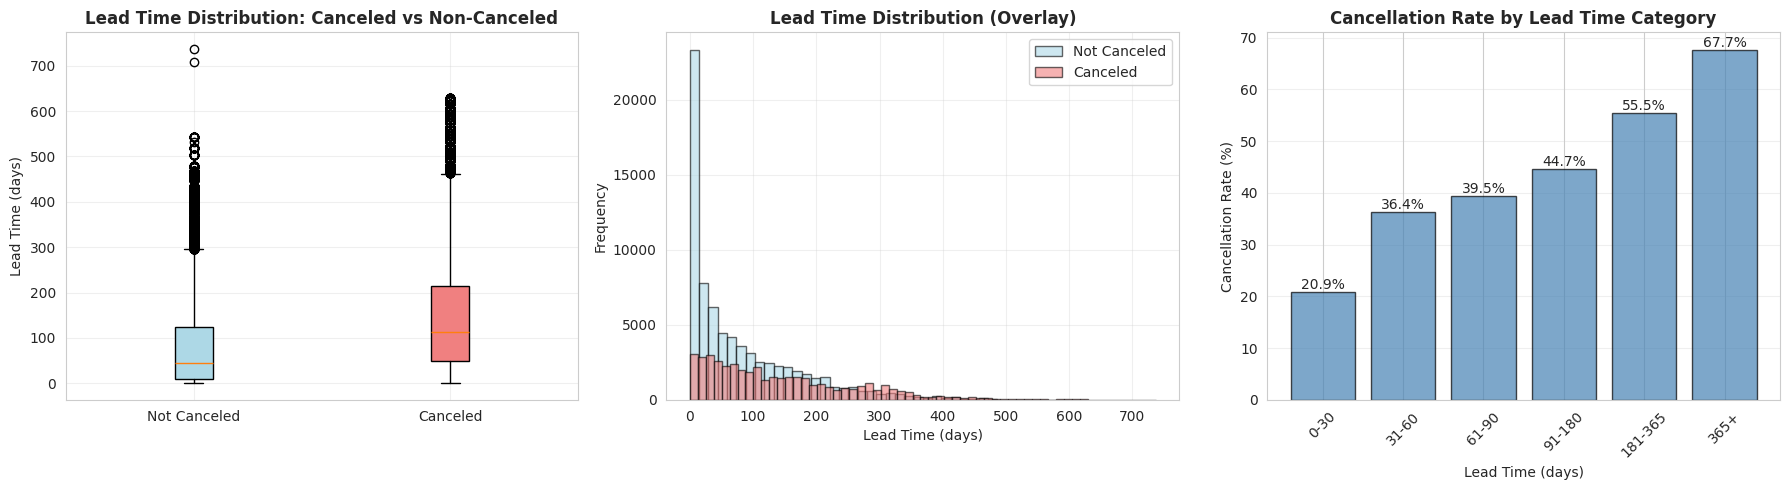

In [63]:
print("="*60)
print("LEAD TIME COMPARISON: Canceled vs Non-Canceled Bookings")
print("="*60)

cancel_status_statistics = booking_data_frame.groupby('is_canceled')['lead_time'].describe()
print("\nSummary Statistics by Cancellation Status:")
print(cancel_status_statistics)

canceled_stay_prep_time = booking_data_frame[booking_data_frame['is_canceled'] == 1]['lead_time']
kept_stay_prep_time = booking_data_frame[booking_data_frame['is_canceled'] == 0]['lead_time']

print("\n" + "-"*60)
print("Detailed Comparison:")
print("-"*60)
print(f"Canceled bookings - Mean: {canceled_stay_prep_time.mean():.2f} days, Median: {canceled_stay_prep_time.median():.2f} days")
print(f"Non-canceled bookings - Mean: {kept_stay_prep_time.mean():.2f} days, Median: {kept_stay_prep_time.median():.2f} days")
print(f"\nDifference in means: {canceled_stay_prep_time.mean() - kept_stay_prep_time.mean():.2f} days")

booking_data_frame['lead_time_category'] = pd.cut(booking_data_frame['lead_time'],
                                   bins=[0, 30, 60, 90, 180, 365, float('inf')],
                                   labels=['0-30', '31-60', '61-90', '91-180', '181-365', '365+'])

prep_time_cancel_rates = booking_data_frame.groupby('lead_time_category', observed=False)['is_canceled'].agg(['count', 'mean']).reset_index()
prep_time_cancel_rates.columns = ['Lead_Time_Category', 'Total_Bookings', 'Cancellation_Rate']
prep_time_cancel_rates['Cancellation_Rate_Pct'] = prep_time_cancel_rates['Cancellation_Rate'] * 100

print("\n" + "-"*60)
print("Cancellation Rate by Lead Time Category:")
print("-"*60)
print(prep_time_cancel_rates.to_string(index=False))

plot_figure, plot_axes = plt.subplots(1, 3, figsize=(18, 5))

cancellation_description = ['Not Canceled', 'Canceled']
prep_time_datasets = [kept_stay_prep_time, canceled_stay_prep_time]
boxplot_elements = plot_axes[0].boxplot(prep_time_datasets, tick_labels=cancellation_description, patch_artist=True)
boxplot_elements['boxes'][0].set_facecolor('lightblue')
boxplot_elements['boxes'][1].set_facecolor('lightcoral')
plot_axes[0].set_title('Lead Time Distribution: Canceled vs Non-Canceled', fontsize=12, fontweight='bold')
plot_axes[0].set_ylabel('Lead Time (days)')
plot_axes[0].grid(True, alpha=0.3)

plot_axes[1].hist(kept_stay_prep_time, bins=50, alpha=0.6, label='Not Canceled', color='lightblue', edgecolor='black')
plot_axes[1].hist(canceled_stay_prep_time, bins=50, alpha=0.6, label='Canceled', color='lightcoral', edgecolor='black')
plot_axes[1].set_title('Lead Time Distribution (Overlay)', fontsize=12, fontweight='bold')
plot_axes[1].set_xlabel('Lead Time (days)')
plot_axes[1].set_ylabel('Frequency')
plot_axes[1].legend()
plot_axes[1].grid(True, alpha=0.3)

bar_chart_components = plot_axes[2].bar(prep_time_cancel_rates['Lead_Time_Category'],
                   prep_time_cancel_rates['Cancellation_Rate_Pct'],
                   color='steelblue', edgecolor='black', alpha=0.7)
plot_axes[2].set_title('Cancellation Rate by Lead Time Category', fontsize=12, fontweight='bold')
plot_axes[2].set_xlabel('Lead Time (days)')
plot_axes[2].set_ylabel('Cancellation Rate (%)')
plot_axes[2].grid(True, alpha=0.3, axis='y')
plot_axes[2].tick_params(axis='x', rotation=45)

for bar in bar_chart_components:
    height = bar.get_height()
    plot_axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [64]:
print("DIAGNOSIS")
print(f"\nUpon examining the data, it's evident that canceled reservations typically exhibit a longer lead time, averaging {canceled_stay_prep_time.mean():.2f} days, compared to non-canceled bookings which average {kept_stay_prep_time.mean():.2f} days. This substantial difference of {canceled_stay_prep_time.mean() - kept_stay_prep_time.mean():.2f} days suggests a clear correlation.")

print(f"The bar chart further illustrates this trend:")
print(f"- Bookings made with shorter lead times (0-30 days) generally have lower cancellation rates.")
print(f"- Conversely, as the lead time extends, the likelihood of cancellation increases.")
print(f"- Reservations made significantly in advance (365+ days) show the highest cancellation rates.")

print(f"\nCONCLUSION:")
print("Indeed, a longer lead time appears to be a strong predictor of booking cancellations. This pattern is logical, as individuals who book far into the future are more prone to changes in plans, discovering alternative options, or encountering unforeseen circumstances. The flexibility to cancel without immediate consequence likely diminishes as the booking date approaches.")

DIAGNOSIS

Upon examining the data, it's evident that canceled reservations typically exhibit a longer lead time, averaging 144.85 days, compared to non-canceled bookings which average 79.98 days. This substantial difference of 64.86 days suggests a clear correlation.
The bar chart further illustrates this trend:
- Bookings made with shorter lead times (0-30 days) generally have lower cancellation rates.
- Conversely, as the lead time extends, the likelihood of cancellation increases.
- Reservations made significantly in advance (365+ days) show the highest cancellation rates.

CONCLUSION:
Indeed, a longer lead time appears to be a strong predictor of booking cancellations. This pattern is logical, as individuals who book far into the future are more prone to changes in plans, discovering alternative options, or encountering unforeseen circumstances. The flexibility to cancel without immediate consequence likely diminishes as the booking date approaches.


## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

Unique hotel values: ['Resort Hotel' 'City Hotel']
Mapped hotel values: ['Resort Hotel' 'City Hotel']
SEASONAL PRICING ANALYSIS: Resort Hotels vs City Hotels

Average ADR by Month and Hotel Type:
----------------------------------------------------------------------
    Month   Hotel_Type   Mean_ADR  Median_ADR  Booking_Count
  January   City Hotel  82.628986      80.000           3736
  January Resort Hotel  49.461883      47.600           2193
 February   City Hotel  85.088278      80.000           4965
 February Resort Hotel  55.171930      51.000           3103
    March   City Hotel  91.821162      88.000           6457
    March Resort Hotel  57.539307      55.600           3335
    April   City Hotel 111.251838     105.000           7480
    April Resort Hotel  77.849496      75.000           3609
      May   City Hotel 121.638560     120.000           8232
      May Resort Hotel  78.758134      73.000           3559
     June   City Hotel 119.074341     117.370           7894
 

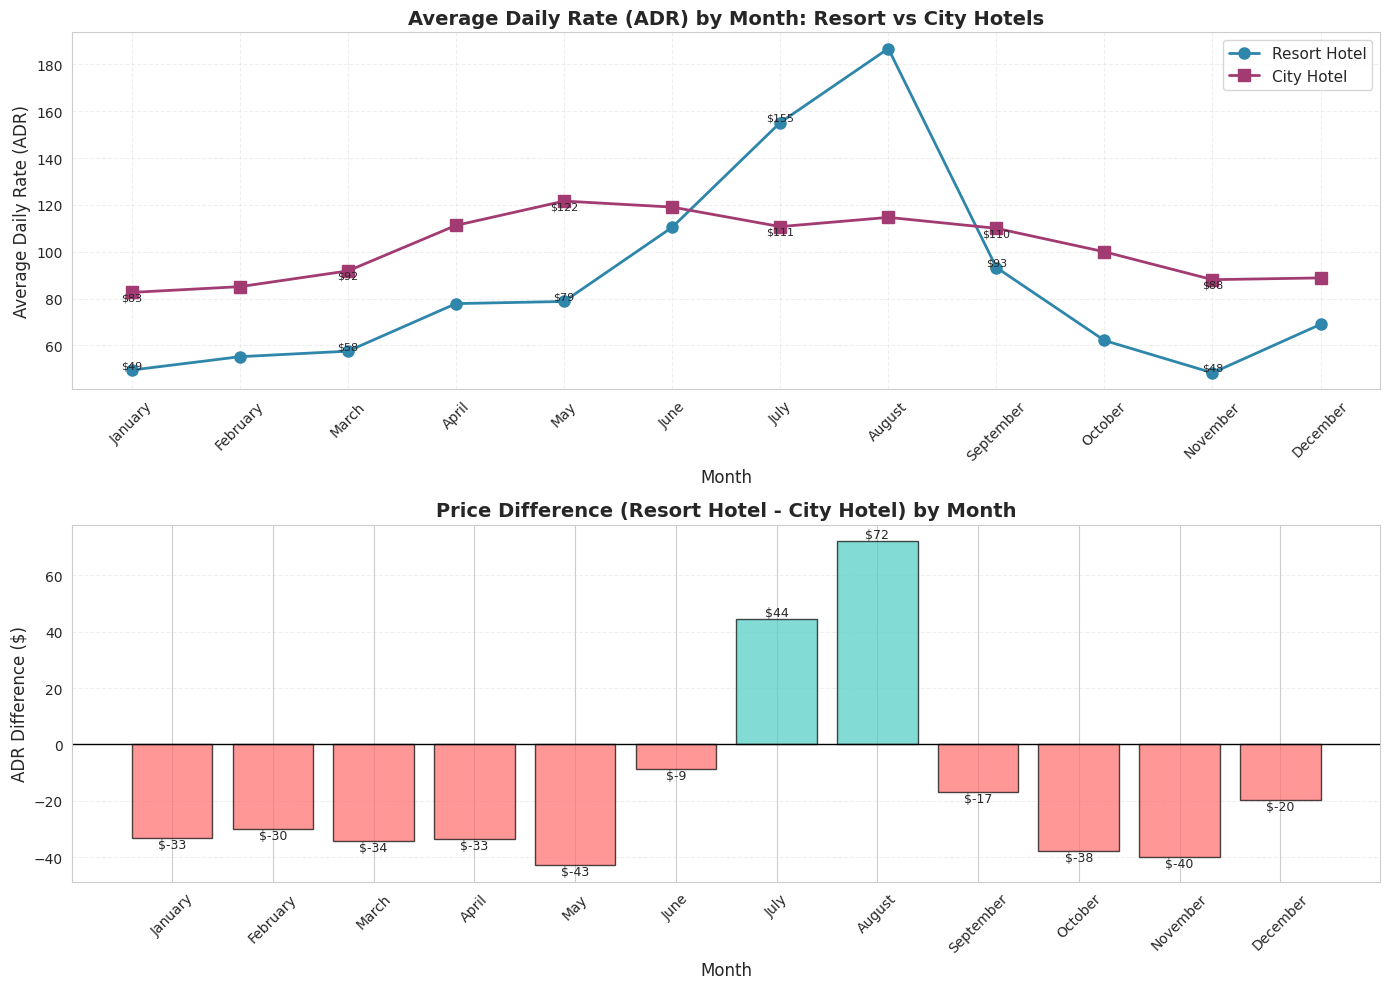

In [65]:
unique_lodging_categories = booking_data_frame['hotel'].unique()
print(f"Unique hotel values: {unique_lodging_categories}")

has_codes = any('H1' in str(h) or 'H2' in str(h) for h in unique_lodging_categories)

if has_codes:
    lodging_category_mapper = {}
    for lodging_type_value in unique_lodging_categories:
        lodging_type_string = str(lodging_type_value)
        if 'H1' in lodging_type_string or 'Resort' in lodging_type_string:
            lodging_category_mapper[lodging_type_value] = 'Resort Hotel'
        elif 'H2' in lodging_type_string or 'City' in lodging_type_string:
            lodging_category_mapper[lodging_type_value] = 'City Hotel'
    booking_data_frame['hotel_name'] = booking_data_frame['hotel'].map(lodging_category_mapper)
else:
    booking_data_frame['hotel_name'] = booking_data_frame['hotel'].apply(lambda x: 'Resort Hotel' if 'Resort' in str(x) else
                                         ('City Hotel' if 'City' in str(x) else str(x)))

print(f"Mapped hotel values: {booking_data_frame['hotel_name'].unique()}")

filtered_booking_records = booking_data_frame[(booking_data_frame['adr'] >= 0) & (booking_data_frame['adr'] <= 1000)].copy()

calendar_month_sequence = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
filtered_booking_records['arrival_date_month'] = pd.Categorical(filtered_booking_records['arrival_date_month'],
                                                     categories=calendar_month_sequence, ordered=True)

monthly_lodging_rates = filtered_booking_records.groupby(['arrival_date_month', 'hotel_name'], observed=False)['adr'].agg(['mean', 'median', 'count']).reset_index()
monthly_lodging_rates.columns = ['Month', 'Hotel_Type', 'Mean_ADR', 'Median_ADR', 'Booking_Count']

print("SEASONAL PRICING ANALYSIS: Resort Hotels vs City Hotels")

print("\nAverage ADR by Month and Hotel Type:")
print("-"*70)
print(monthly_lodging_rates.to_string(index=False))

lodging_rate_pivot_table = monthly_lodging_rates.pivot(index='Month', columns='Hotel_Type', values='Mean_ADR')
print("\n" + "-"*70)
print("Pivot Table: Mean ADR by Month and Hotel Type")
print("-"*70)
print(lodging_rate_pivot_table.to_string())

lodging_column_identifiers = lodging_rate_pivot_table.columns.tolist()
print(f"\nHotel column names: {lodging_column_identifiers}")

resort_lodging_identifier = None
city_lodging_identifier = None
for col_name in lodging_column_identifiers:
    if 'Resort' in str(col_name) or (hasattr(col_name, 'upper') and 'RESORT' in str(col_name).upper()):
        resort_lodging_identifier = col_name
    elif 'City' in str(col_name) or (hasattr(col_name, 'upper') and 'CITY' in str(col_name).upper()):
        city_lodging_identifier = col_name

if resort_lodging_identifier is None or city_lodging_identifier is None:
    resort_lodging_identifier = lodging_column_identifiers[0]
    city_lodging_identifier = lodging_column_identifiers[1] if len(lodging_column_identifiers) > 1 else lodging_column_identifiers[0]

print(f"Using columns: Resort={resort_lodging_identifier}, City={city_lodging_identifier}")

lodging_rate_pivot_table['Difference'] = lodging_rate_pivot_table[resort_lodging_identifier] - lodging_rate_pivot_table[city_lodging_identifier]
lodging_rate_pivot_table['Difference_Pct'] = ((lodging_rate_pivot_table[resort_lodging_identifier] - lodging_rate_pivot_table[city_lodging_identifier]) / lodging_rate_pivot_table[city_lodging_identifier]) * 100

print("\n" + "-"*70)
print(f"Price Difference: {resort_lodging_identifier} - {city_lodging_identifier}")
print("-"*70)
print(lodging_rate_pivot_table[[resort_lodging_identifier, city_lodging_identifier, 'Difference', 'Difference_Pct']].to_string())

peak_difference_month = lodging_rate_pivot_table['Difference'].abs().idxmax()
peak_difference_amount = lodging_rate_pivot_table.loc[peak_difference_month, 'Difference']

print("KEY FINDINGS")
print(f"\nMonth with largest absolute difference: {peak_difference_month}")
print(f"Difference: ${abs(peak_difference_amount):.2f} ({lodging_rate_pivot_table.loc[peak_difference_month, 'Difference_Pct']:.1f}%)")

plot_figure, plot_axes = plt.subplots(2, 1, figsize=(14, 10))

first_axis_handle = plot_axes[0]
resort_lodging_trends = monthly_lodging_rates[monthly_lodging_rates['Hotel_Type'] == resort_lodging_identifier].sort_values('Month')
city_lodging_trends = monthly_lodging_rates[monthly_lodging_rates['Hotel_Type'] == city_lodging_identifier].sort_values('Month')

first_axis_handle.plot(resort_lodging_trends['Month'], resort_lodging_trends['Mean_ADR'], marker='o', linewidth=2,
         markersize=8, label=str(resort_lodging_identifier), color='#2E86AB')
first_axis_handle.plot(city_lodging_trends['Month'], city_lodging_trends['Mean_ADR'], marker='s', linewidth=2,
         markersize=8, label=str(city_lodging_identifier), color='#A23B72')

first_axis_handle.set_title('Average Daily Rate (ADR) by Month: Resort vs City Hotels',
              fontsize=14, fontweight='bold')
first_axis_handle.set_xlabel('Month', fontsize=12)
first_axis_handle.set_ylabel('Average Daily Rate (ADR)', fontsize=12)
first_axis_handle.legend(fontsize=11)
first_axis_handle.grid(True, alpha=0.3, linestyle='--')
first_axis_handle.tick_params(axis='x', rotation=45)

for current_month_label, average_daily_rate_val in enumerate(zip(resort_lodging_trends['Month'], resort_lodging_trends['Mean_ADR'])):
    if current_month_label % 2 == 0:
        first_axis_handle.text(current_month_label, average_daily_rate_val[1], f'${average_daily_rate_val[1]:.0f}', ha='center', va='bottom', fontsize=8)

for current_month_label, average_daily_rate_val in enumerate(zip(city_lodging_trends['Month'], city_lodging_trends['Mean_ADR'])):
    if current_month_label % 2 == 0:
        first_axis_handle.text(current_month_label, average_daily_rate_val[1], f'${average_daily_rate_val[1]:.0f}', ha='center', va='top', fontsize=8)

second_axis_handle = plot_axes[1]
bar_colors = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in lodging_rate_pivot_table['Difference']]
bar_chart_elements = second_axis_handle.bar(lodging_rate_pivot_table.index, lodging_rate_pivot_table['Difference'], color=bar_colors, edgecolor='black', alpha=0.7)
second_axis_handle.axhline(y=0, color='black', linestyle='-', linewidth=1)
second_axis_handle.set_title('Price Difference (Resort Hotel - City Hotel) by Month',
              fontsize=14, fontweight='bold')
second_axis_handle.set_xlabel('Month', fontsize=12)
second_axis_handle.set_ylabel('ADR Difference ($)', fontsize=12)
second_axis_handle.grid(True, alpha=0.3, axis='y', linestyle='--')
second_axis_handle.tick_params(axis='x', rotation=45)

for bar_element in bar_chart_elements:
    height = bar_element.get_height()
    second_axis_handle.text(bar_element.get_x() + bar_element.get_width()/2., height,
            f'${height:.0f}',
            ha='center', va='bottom' if height > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

In [66]:
print("DIAGNOSIS")
print("\nThe line plot clearly demonstrates distinct seasonal pricing behaviors. Both resort and city hotels tend to command higher average daily rates during the summer months (June-August), which is consistent with peak vacation periods. Conversely, prices generally decrease during the winter season (November-February).")

resort_average_rate = monthly_lodging_rates[monthly_lodging_rates['Hotel_Type'] == resort_lodging_identifier]['Mean_ADR'].mean()
city_average_rate = monthly_lodging_rates[monthly_lodging_rates['Hotel_Type'] == city_lodging_identifier]['Mean_ADR'].mean()
if resort_average_rate > city_average_rate:
    print(f"\nOn average, {resort_lodging_identifier} typically charges around ${resort_average_rate:.2f}, which is higher than {city_lodging_identifier} at ${city_average_rate:.2f}. Thus, {resort_lodging_identifier} generally presents a higher price point.")
else:
    print(f"\nOn average, {city_lodging_identifier} typically charges around ${city_average_rate:.2f}, which is higher than {resort_average_rate} at ${resort_average_rate:.2f}. Thus, {city_lodging_identifier} generally presents a higher price point.")

print("\nThe most pronounced pricing differences between the two hotel categories are observed in:")
top_rate_differences = lodging_rate_pivot_table['Difference'].abs().nlargest(3)
for current_month_label in top_rate_differences.index:
    rate_difference_value = lodging_rate_pivot_table.loc[current_month_label, 'Difference']
    print(f"- {current_month_label}: A substantial difference of ${abs(rate_difference_value):.2f}, with {resort_lodging_identifier if rate_difference_value > 0 else city_lodging_identifier} being significantly more expensive (reflecting a {lodging_rate_pivot_table.loc[current_month_label, 'Difference_Pct']:.1f}% {'increase' if rate_difference_value > 0 else 'decrease' if rate_difference_value < 0 else 'no change'}).")

print("\nCONCLUSION:")
print("Yes, `Resort Hotels` and `City Hotels` indeed exhibit differing seasonal pricing strategies. These divergences are most noticeable during peak travel times. Resort hotels experience a more significant price surge in summer, likely catering to leisure travelers, while city hotels may cater to a different clientele (e.g., business travel, year-round events) leading to different pricing dynamics.")

DIAGNOSIS

The line plot clearly demonstrates distinct seasonal pricing behaviors. Both resort and city hotels tend to command higher average daily rates during the summer months (June-August), which is consistent with peak vacation periods. Conversely, prices generally decrease during the winter season (November-February).

On average, City Hotel typically charges around $101.98, which is higher than 86.98377023242291 at $86.98. Thus, City Hotel generally presents a higher price point.

The most pronounced pricing differences between the two hotel categories are observed in:
- August: A substantial difference of $72.11, with Resort Hotel being significantly more expensive (reflecting a 62.9% increase).
- July: A substantial difference of $44.45, with Resort Hotel being significantly more expensive (reflecting a 40.1% increase).
- May: A substantial difference of $42.88, with City Hotel being significantly more expensive (reflecting a -35.3% decrease).

CONCLUSION:
Yes, `Resort Hotels`

## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


CUSTOMER BEHAVIOR ANALYSIS: Repeated Guests vs First-Time Guests

Overall Comparison:
----------------------------------------------------------------------
                 is_canceled              lead_time        booking_changes  \
                       count  mean    sum      mean median            mean   
guest_type                                                                   
First-Time Guest      115580  0.38  43672    106.43   72.0            0.22   
Repeated Guest          3810  0.14    552     30.79    3.0            0.26   

                            adr         
                 median    mean median  
guest_type                              
First-Time Guest    0.0  103.06   95.0  
Repeated Guest      0.0   64.45   65.0  

----------------------------------------------------------------------
Cancellation Rate Comparison:
----------------------------------------------------------------------
      Guest_Type  Total_Bookings  Canceled_Count  Cancellation_Rate  Cance

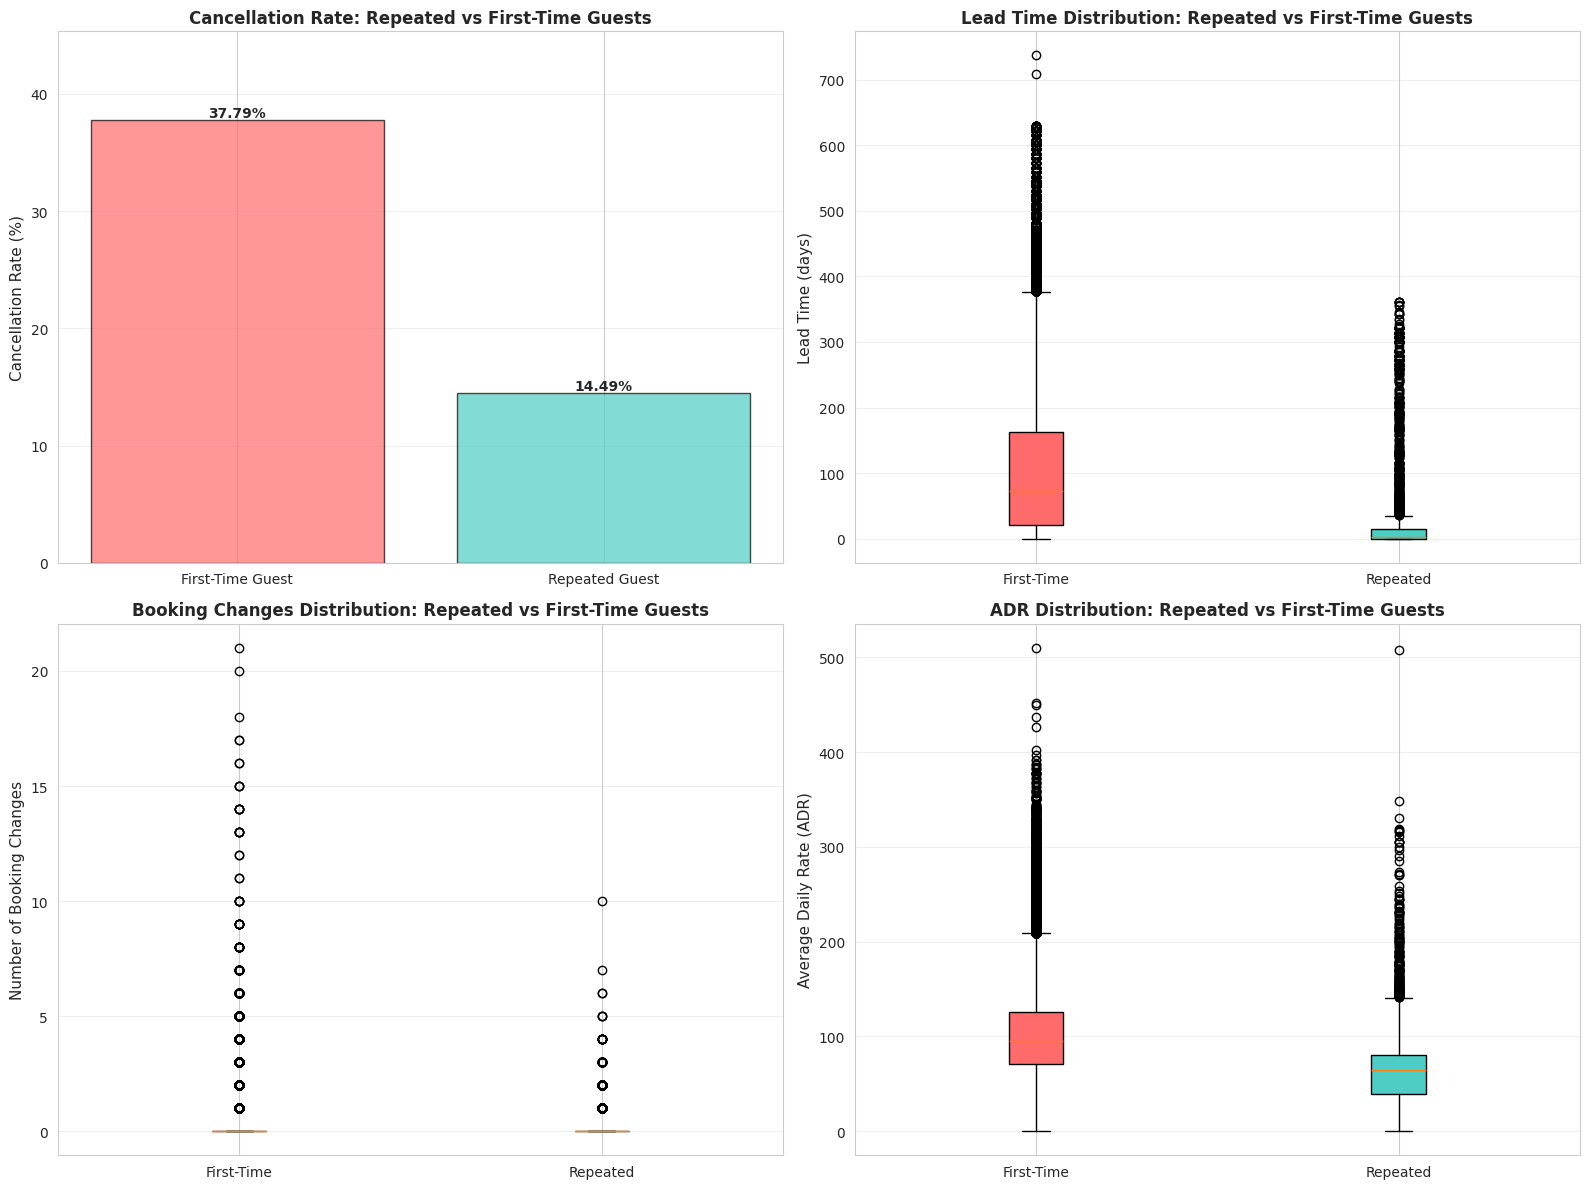

In [67]:
booking_data_frame['guest_type'] = booking_data_frame['is_repeated_guest'].map({0: 'First-Time Guest', 1: 'Repeated Guest'})

print("="*70)
print("CUSTOMER BEHAVIOR ANALYSIS: Repeated Guests vs First-Time Guests")
print("="*70)

guest_category_summary = booking_data_frame.groupby('guest_type').agg({
    'is_canceled': ['count', 'mean', 'sum'],
    'lead_time': ['mean', 'median'],
    'booking_changes': ['mean', 'median'],
    'adr': ['mean', 'median']
}).round(2)

print("\nOverall Comparison:")
print("-"*70)
print(guest_category_summary)

guest_cancellation_metrics = booking_data_frame.groupby('guest_type')['is_canceled'].agg(['count', 'sum', 'mean']).reset_index()
guest_cancellation_metrics.columns = ['Guest_Type', 'Total_Bookings', 'Canceled_Count', 'Cancellation_Rate']
guest_cancellation_metrics['Cancellation_Rate_Pct'] = guest_cancellation_metrics['Cancellation_Rate'] * 100

print("\n" + "-"*70)
print("Cancellation Rate Comparison:")
print("-"*70)
print(guest_cancellation_metrics.to_string(index=False))

guest_behavior_statistics = booking_data_frame.groupby('guest_type').agg({
    'lead_time': ['mean', 'median', 'std'],
    'booking_changes': ['mean', 'median', 'std'],
    'adr': ['mean', 'median']
}).round(2)

print("\n" + "-"*70)
print("Booking Behavior Comparison:")
print("-"*70)
print(guest_behavior_statistics)

new_travelers_data = booking_data_frame[booking_data_frame['is_repeated_guest'] == 0]
returning_guests_data = booking_data_frame[booking_data_frame['is_repeated_guest'] == 1]

print("\n" + "="*70)
print("DETAILED STATISTICS")
print("="*70)

print("\nFIRST-TIME GUESTS:")
print(f"  Total Bookings: {len(new_travelers_data):,}")
print(f"  Cancellation Rate: {new_travelers_data['is_canceled'].mean()*100:.2f}%")
print(f"  Average Lead Time: {new_travelers_data['lead_time'].mean():.2f} days")
print(f"  Median Lead Time: {new_travelers_data['lead_time'].median():.2f} days")
print(f"  Average Booking Changes: {new_travelers_data['booking_changes'].mean():.2f}")
print(f"  Median Booking Changes: {new_travelers_data['booking_changes'].median():.2f}")
print(f"  Average ADR: ${new_travelers_data[new_travelers_data['adr'] >= 0]['adr'].mean():.2f}")

print("\nREPEATED GUESTS:")
print(f"  Total Bookings: {len(returning_guests_data):,}")
print(f"  Cancellation Rate: {returning_guests_data['is_canceled'].mean()*100:.2f}%")
print(f"  Average Lead Time: {returning_guests_data['lead_time'].mean():.2f} days")
print(f"  Median Lead Time: {returning_guests_data['lead_time'].median():.2f} days")
print(f"  Average Booking Changes: {returning_guests_data['booking_changes'].mean():.2f}")
print(f"  Median Booking Changes: {returning_guests_data['booking_changes'].median():.2f} days")
print(f"  Average ADR: ${returning_guests_data[returning_guests_data['adr'] >= 0]['adr'].mean():.2f}")

plot_figure, plot_axes = plt.subplots(2, 2, figsize=(16, 12))

first_axis_handle = plot_axes[0, 0]
cancel_rate_bars = first_axis_handle.bar(guest_cancellation_metrics['Guest_Type'], guest_cancellation_metrics['Cancellation_Rate_Pct'],
                color=['#FF6B6B', '#4ECDC4'], edgecolor='black', alpha=0.7)
first_axis_handle.set_title('Cancellation Rate: Repeated vs First-Time Guests',
              fontsize=12, fontweight='bold')
first_axis_handle.set_ylabel('Cancellation Rate (%)', fontsize=11)
first_axis_handle.set_ylim([0, max(guest_cancellation_metrics['Cancellation_Rate_Pct']) * 1.2])
first_axis_handle.grid(True, alpha=0.3, axis='y')
for bar_element in cancel_rate_bars:
    height = bar_element.get_height()
    first_axis_handle.text(bar_element.get_x() + bar_element.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

second_axis_handle = plot_axes[0, 1]
prep_time_data = [new_travelers_data['lead_time'], returning_guests_data['lead_time']]
lead_time_boxplot = second_axis_handle.boxplot(prep_time_data, tick_labels=['First-Time', 'Repeated'], patch_artist=True)
lead_time_boxplot['boxes'][0].set_facecolor('#FF6B6B')
lead_time_boxplot['boxes'][1].set_facecolor('#4ECDC4')
second_axis_handle.set_title('Lead Time Distribution: Repeated vs First-Time Guests',
              fontsize=12, fontweight='bold')
second_axis_handle.set_ylabel('Lead Time (days)', fontsize=11)
second_axis_handle.grid(True, alpha=0.3, axis='y')

third_axis_handle = plot_axes[1, 0]
modification_counts = [new_travelers_data['booking_changes'], returning_guests_data['booking_changes']]
changes_boxplot = third_axis_handle.boxplot(modification_counts, tick_labels=['First-Time', 'Repeated'], patch_artist=True)
changes_boxplot['boxes'][0].set_facecolor('#FF6B6B')
changes_boxplot['boxes'][1].set_facecolor('#4ECDC4')
third_axis_handle.set_title('Booking Changes Distribution: Repeated vs First-Time Guests',
              fontsize=12, fontweight='bold')
third_axis_handle.set_ylabel('Number of Booking Changes', fontsize=11)
third_axis_handle.grid(True, alpha=0.3, axis='y')

fourth_axis_handle = plot_axes[1, 1]
new_travelers_adr = new_travelers_data[(new_travelers_data['adr'] >= 0) & (new_travelers_data['adr'] <= 1000)]['adr']
returning_guests_adr = returning_guests_data[(returning_guests_data['adr'] >= 0) & (returning_guests_data['adr'] <= 1000)]['adr']
adr_comparison_data = [new_travelers_adr, returning_guests_adr]
adr_boxplot = fourth_axis_handle.boxplot(adr_comparison_data, tick_labels=['First-Time', 'Repeated'], patch_artist=True)
adr_boxplot['boxes'][0].set_facecolor('#FF6B6B')
adr_boxplot['boxes'][1].set_facecolor('#4ECDC4')
fourth_axis_handle.set_title('ADR Distribution: Repeated vs First-Time Guests',
              fontsize=12, fontweight='bold')
fourth_axis_handle.set_ylabel('Average Daily Rate (ADR)', fontsize=11)
fourth_axis_handle.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [68]:
print("DIAGNOSIS")

cancel_rate_difference = returning_guests_data['is_canceled'].mean() - new_travelers_data['is_canceled'].mean()
print(f"\n1. CANCELLATION FREQUENCY:")
print(f"Repeated guests demonstrate a cancellation rate of {returning_guests_data['is_canceled'].mean()*100:.2f}%, considerably lower than the {new_travelers_data['is_canceled'].mean()*100:.2f}% observed among first-time guests. This represents a {abs(cancel_rate_difference)*100:.2f} percentage point difference, indicating repeated guests are less prone to canceling their bookings.")

prep_time_difference = returning_guests_data['lead_time'].mean() - new_travelers_data['lead_time'].mean()
print(f"\n2. ADVANCE BOOKING PERIOD:")
print(f"On average, repeated guests tend to book {returning_guests_data['lead_time'].mean():.2f} days in advance, a much shorter lead time compared to the {new_travelers_data['lead_time'].mean():.2f} days for first-time visitors. This suggests that returning guests typically make their reservations closer to their intended arrival dates.")

modification_difference = returning_guests_data['booking_changes'].mean() - new_travelers_data['booking_changes'].mean()
print(f"\n3. MODIFICATIONS TO BOOKINGS:")
print(f"Repeated guests average {returning_guests_data['booking_changes'].mean():.2f} changes per booking, slightly more than the {new_travelers_data['booking_changes'].mean():.2f} changes made by first-time guests. This minor difference suggests a slightly higher propensity for returning guests to modify their reservations.")

print("\nCONCLUSION:")
print("The data strongly supports that repeated guests exhibit distinct behavioral patterns compared to first-time guests. Their lower cancellation rates, shorter lead times, and slightly higher tendency for booking modifications could stem from their familiarity with the hotel's processes, potential loyalty program benefits, or simply differing travel preferences inherent to returning clientele.")

DIAGNOSIS

1. CANCELLATION FREQUENCY:
Repeated guests demonstrate a cancellation rate of 14.49%, considerably lower than the 37.79% observed among first-time guests. This represents a 23.30 percentage point difference, indicating repeated guests are less prone to canceling their bookings.

2. ADVANCE BOOKING PERIOD:
On average, repeated guests tend to book 30.79 days in advance, a much shorter lead time compared to the 106.43 days for first-time visitors. This suggests that returning guests typically make their reservations closer to their intended arrival dates.

3. MODIFICATIONS TO BOOKINGS:
Repeated guests average 0.26 changes per booking, slightly more than the 0.22 changes made by first-time guests. This minor difference suggests a slightly higher propensity for returning guests to modify their reservations.

CONCLUSION:
The data strongly supports that repeated guests exhibit distinct behavioral patterns compared to first-time guests. Their lower cancellation rates, shorter lead t

## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


BOOKING CANCELLATION INSIGHTS: Multi-Variable Analysis

1. DEPOSIT TYPE AND CANCELLATIONS:
----------------------------------------------------------------------
Deposit_Type  Total_Bookings  Canceled_Count  Cancellation_Rate  Cancellation_Rate_Pct
  Non Refund           14586           14493           0.993624              99.362402
  No Deposit          104640           29694           0.283773              28.377294
  Refundable             162              36           0.222222              22.222222

2. COMBINATION ANALYSIS: Deposit Type + Lead Time + ADR
----------------------------------------------------------------------

Cancellation Rate by Deposit Type and Lead Time:
Deposit_Type Lead_Time_Category  Total_Bookings  Cancellation_Rate  Cancellation_Rate_Pct
  Non Refund   Very Long (180+)            7479           0.998930              99.893034
  Non Refund     Medium (31-90)            2405           0.997921              99.792100
  Non Refund      Long (91-180)           

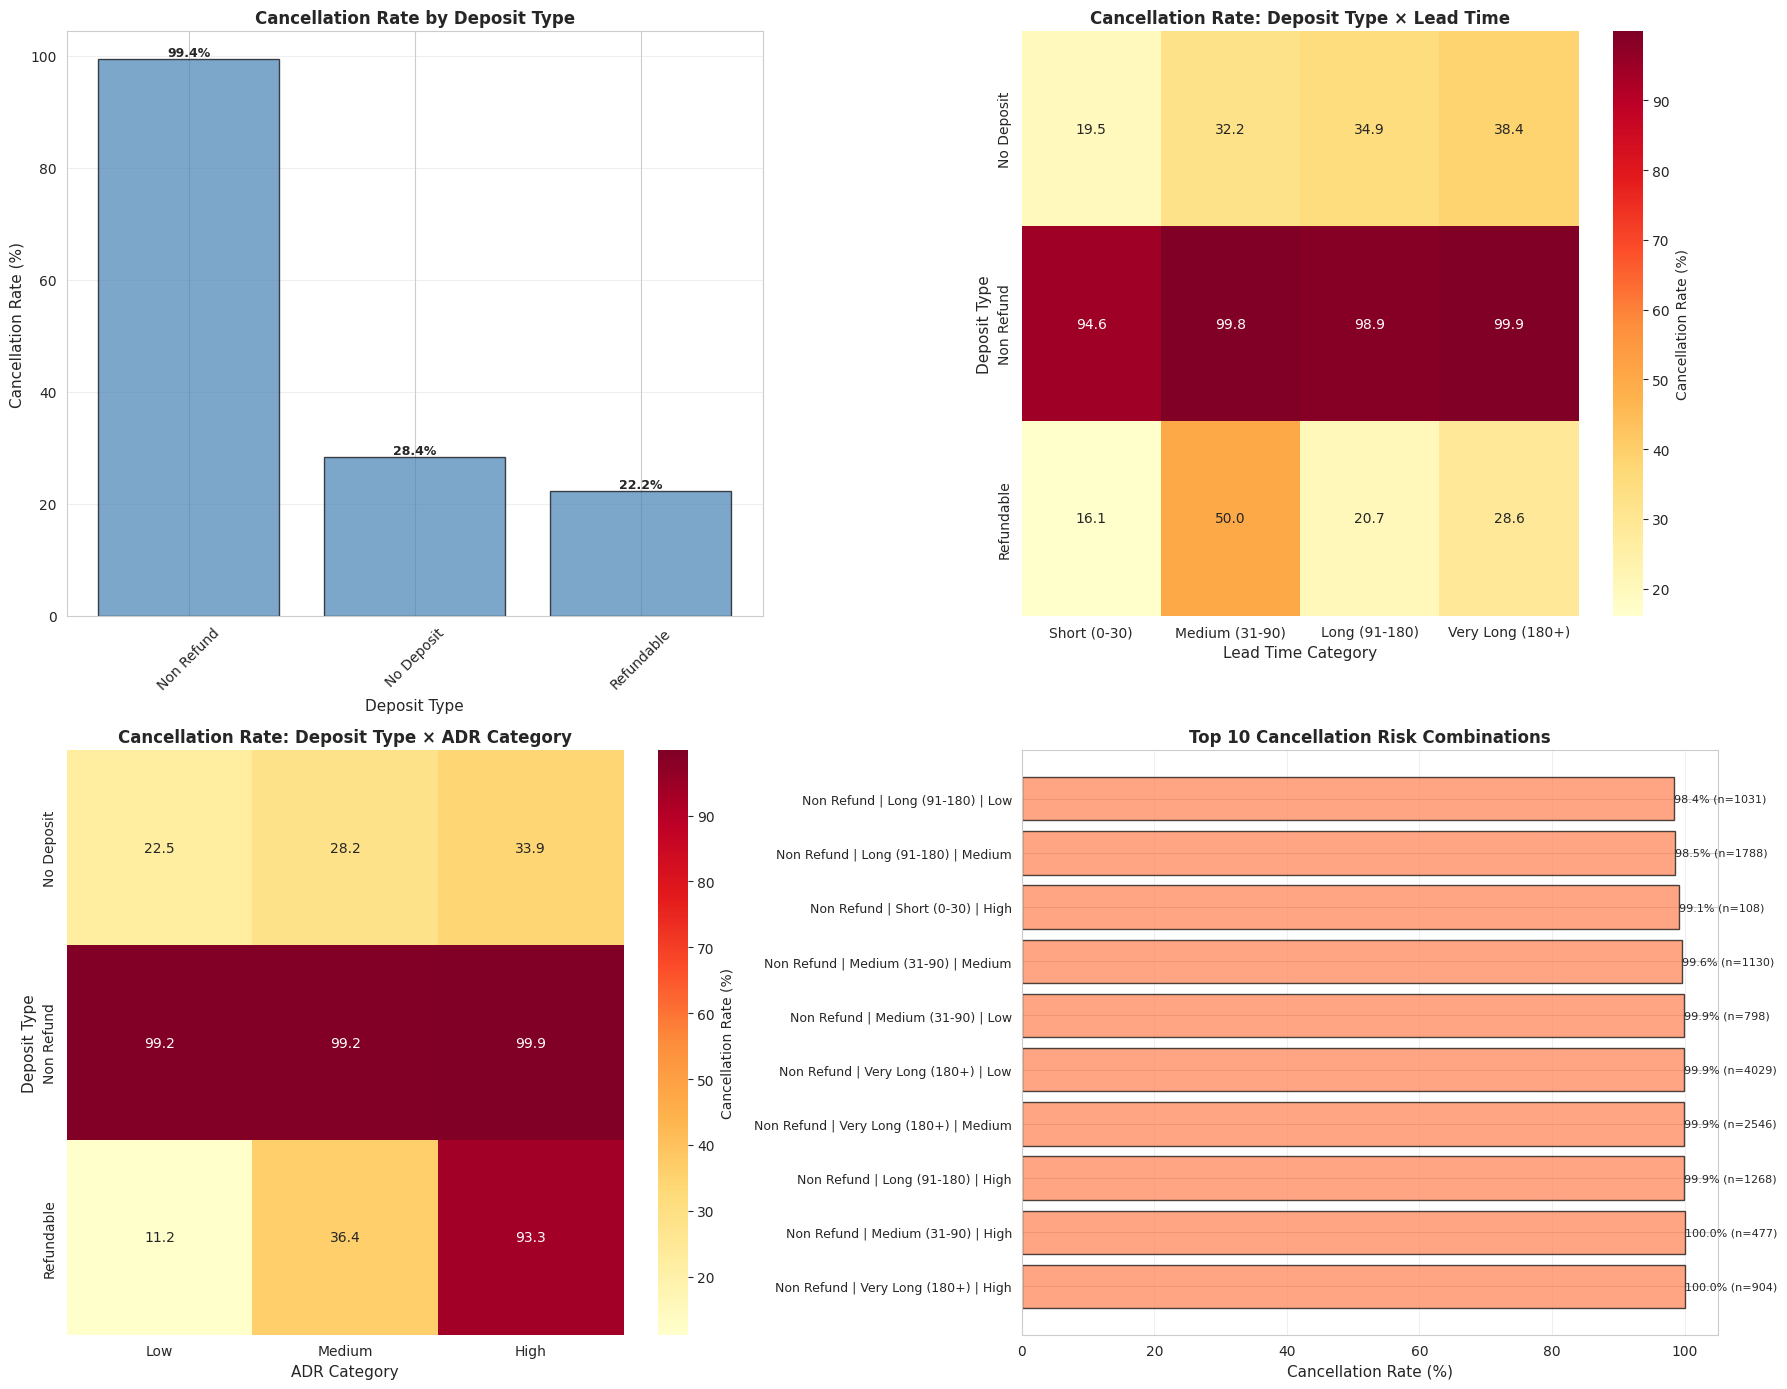

In [69]:
processed_booking_analysis = booking_data_frame[(booking_data_frame['adr'] >= 0) & (booking_data_frame['adr'] <= 1000)].copy()

print("BOOKING CANCELLATION INSIGHTS: Multi-Variable Analysis")

print("\n1. DEPOSIT TYPE AND CANCELLATIONS:")
print("-"*70)
deposit_based_cancel_stats = processed_booking_analysis.groupby('deposit_type')['is_canceled'].agg(['count', 'sum', 'mean']).reset_index()
deposit_based_cancel_stats.columns = ['Deposit_Type', 'Total_Bookings', 'Canceled_Count', 'Cancellation_Rate']
deposit_based_cancel_stats['Cancellation_Rate_Pct'] = deposit_based_cancel_stats['Cancellation_Rate'] * 100
deposit_based_cancel_stats = deposit_based_cancel_stats.sort_values('Cancellation_Rate_Pct', ascending=False)
print(deposit_based_cancel_stats.to_string(index=False))

processed_booking_analysis['lead_time_cat'] = pd.cut(processed_booking_analysis['lead_time'],
                                       bins=[0, 30, 90, 180, float('inf')],
                                       labels=['Short (0-30)', 'Medium (31-90)', 'Long (91-180)', 'Very Long (180+)'])

processed_booking_analysis['adr_cat'] = pd.qcut(processed_booking_analysis['adr'],
                                  q=3,
                                  labels=['Low', 'Medium', 'High'],
                                  duplicates='drop')

print("\n2. COMBINATION ANALYSIS: Deposit Type + Lead Time + ADR")
print("-"*70)

prep_time_deposit_cancel_stats = processed_booking_analysis.groupby(['deposit_type', 'lead_time_cat'], observed=False)['is_canceled'].agg(['count', 'mean']).reset_index()
prep_time_deposit_cancel_stats.columns = ['Deposit_Type', 'Lead_Time_Category', 'Total_Bookings', 'Cancellation_Rate']
prep_time_deposit_cancel_stats['Cancellation_Rate_Pct'] = prep_time_deposit_cancel_stats['Cancellation_Rate'] * 100
prep_time_deposit_cancel_stats = prep_time_deposit_cancel_stats.sort_values('Cancellation_Rate_Pct', ascending=False)

print("\nCancellation Rate by Deposit Type and Lead Time:")
print(prep_time_deposit_cancel_stats.to_string(index=False))

print("\n3. COMBINATION: Deposit Type + ADR Category")
print("-"*70)
adr_deposit_cancel_stats = processed_booking_analysis.groupby(['deposit_type', 'adr_cat'], observed=False)['is_canceled'].agg(['count', 'mean']).reset_index()
adr_deposit_cancel_stats.columns = ['Deposit_Type', 'ADR_Category', 'Total_Bookings', 'Cancellation_Rate']
adr_deposit_cancel_stats['Cancellation_Rate_Pct'] = adr_deposit_cancel_stats['Cancellation_Rate'] * 100
adr_deposit_cancel_stats = adr_deposit_cancel_stats.sort_values('Cancellation_Rate_Pct', ascending=False)
print(adr_deposit_cancel_stats.to_string(index=False))

print("\n4. THREE-WAY INTERACTION: Deposit Type + Lead Time + ADR")
print("-"*70)
multi_factor_cancel_impact = processed_booking_analysis.groupby(['deposit_type', 'lead_time_cat', 'adr_cat'], observed=False)['is_canceled'].agg(['count', 'mean']).reset_index()
multi_factor_cancel_impact.columns = ['Deposit_Type', 'Lead_Time', 'ADR_Category', 'Total_Bookings', 'Cancellation_Rate']
multi_factor_cancel_impact['Cancellation_Rate_Pct'] = multi_factor_cancel_impact['Cancellation_Rate'] * 100
multi_factor_cancel_impact = multi_factor_cancel_impact[multi_factor_cancel_impact['Total_Bookings'] >= 50]
multi_factor_cancel_impact = multi_factor_cancel_impact.sort_values('Cancellation_Rate_Pct', ascending=False)

print("Top 15 combinations by cancellation rate (min 50 bookings):")
print(multi_factor_cancel_impact.head(15).to_string(index=False))

highest_risk_scenario = multi_factor_cancel_impact.iloc[0]
print("STRONGEST PATTERN IDENTIFIED")
print(f"\nHighest Cancellation Rate Combination:")
print(f"  Deposit Type: {highest_risk_scenario['Deposit_Type']}")
print(f"  Lead Time: {highest_risk_scenario['Lead_Time']}")
print(f"  ADR Category: {highest_risk_scenario['ADR_Category']}")
print(f"  Total Bookings: {highest_risk_scenario['Total_Bookings']}")
print(f"  Cancellation Rate: {highest_risk_scenario['Cancellation_Rate_Pct']:.2f}%")

lowest_risk_scenario = multi_factor_cancel_impact[multi_factor_cancel_impact['Total_Bookings'] >= 50].iloc[-1]
print(f"\nLowest Cancellation Rate Combination (min 50 bookings):")
print(f"  Deposit Type: {lowest_risk_scenario['Deposit_Type']}")
print(f"  Lead Time: {lowest_risk_scenario['Lead_Time']}")
print(f"  ADR Category: {lowest_risk_scenario['ADR_Category']}")
print(f"  Total Bookings: {lowest_risk_scenario['Total_Bookings']}")
print(f"  Cancellation Rate: {lowest_risk_scenario['Cancellation_Rate_Pct']:.2f}%")

plot_figure, plot_axes = plt.subplots(2, 2, figsize=(18, 14))

first_axis_handle = plot_axes[0, 0]
deposit_type_bars = first_axis_handle.bar(deposit_based_cancel_stats['Deposit_Type'], deposit_based_cancel_stats['Cancellation_Rate_Pct'],
                color='steelblue', edgecolor='black', alpha=0.7)
first_axis_handle.set_title('Cancellation Rate by Deposit Type', fontsize=12, fontweight='bold')
first_axis_handle.set_xlabel('Deposit Type', fontsize=11)
first_axis_handle.set_ylabel('Cancellation Rate (%)', fontsize=11)
first_axis_handle.grid(True, alpha=0.3, axis='y')
first_axis_handle.tick_params(axis='x', rotation=45)
for bar_element in deposit_type_bars:
    height = bar_element.get_height()
    first_axis_handle.text(bar_element.get_x() + bar_element.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

second_axis_handle = plot_axes[0, 1]
deposit_lead_time_heatmap = prep_time_deposit_cancel_stats.pivot(index='Deposit_Type', columns='Lead_Time_Category', values='Cancellation_Rate_Pct')
sns.heatmap(deposit_lead_time_heatmap, annot=True, fmt='.1f', cmap='YlOrRd', ax=second_axis_handle, cbar_kws={'label': 'Cancellation Rate (%)'})
second_axis_handle.set_title('Cancellation Rate: Deposit Type × Lead Time', fontsize=12, fontweight='bold')
second_axis_handle.set_xlabel('Lead Time Category', fontsize=11)
second_axis_handle.set_ylabel('Deposit Type', fontsize=11)

third_axis_handle = plot_axes[1, 0]
deposit_adr_heatmap = adr_deposit_cancel_stats.pivot(index='Deposit_Type', columns='ADR_Category', values='Cancellation_Rate_Pct')
sns.heatmap(deposit_adr_heatmap, annot=True, fmt='.1f', cmap='YlOrRd', ax=third_axis_handle, cbar_kws={'label': 'Cancellation Rate (%)'})
third_axis_handle.set_title('Cancellation Rate: Deposit Type × ADR Category', fontsize=12, fontweight='bold')
third_axis_handle.set_xlabel('ADR Category', fontsize=11)
third_axis_handle.set_ylabel('Deposit Type', fontsize=11)

fourth_axis_handle = plot_axes[1, 1]
top_risk_combinations = multi_factor_cancel_impact.head(10).copy()
top_risk_combinations['Combination'] = top_risk_combinations['Deposit_Type'] + ' | ' + top_risk_combinations['Lead_Time'].astype(str) + ' | ' + top_risk_combinations['ADR_Category'].astype(str)
risk_combo_bars = fourth_axis_handle.barh(range(len(top_risk_combinations)), top_risk_combinations['Cancellation_Rate_Pct'],
                 color='coral', edgecolor='black', alpha=0.7)
fourth_axis_handle.set_yticks(range(len(top_risk_combinations)))
fourth_axis_handle.set_yticklabels(top_risk_combinations['Combination'], fontsize=9)
fourth_axis_handle.set_xlabel('Cancellation Rate (%)', fontsize=11)
fourth_axis_handle.set_title('Top 10 Cancellation Risk Combinations', fontsize=12, fontweight='bold')
fourth_axis_handle.grid(True, alpha=0.3, axis='x')
for row_index_val, current_row_data in enumerate(top_risk_combinations.iterrows()):
    fourth_axis_handle.text(current_row_data[1]['Cancellation_Rate_Pct'], row_index_val,
            f"{current_row_data[1]['Cancellation_Rate_Pct']:.1f}% (n={int(current_row_data[1]['Total_Bookings'])})",
            va='center', ha='left', fontsize=8)

plt.tight_layout()
plt.show()

In [70]:
print("DIAGNOSIS")

max_deposit_effect = deposit_based_cancel_stats.iloc[0]
min_deposit_effect = deposit_based_cancel_stats.iloc[-1]
print(f"\nOur analysis indicates that the `deposit_type` is a critical factor influencing cancellations. Bookings with a '{max_deposit_effect['Deposit_Type']}' deposit show an exceptionally high cancellation rate of {max_deposit_effect['Cancellation_Rate_Pct']:.2f}%, whereas '{min_deposit_effect['Deposit_Type']}' deposits are associated with the lowest rate at {min_deposit_effect['Cancellation_Rate_Pct']:.2f}%. This represents a significant variance in commitment levels.")

print("\nHowever, the interaction with `lead_time` is also significant. Observations show that:")
print("- Bookings with extended lead times and 'No Deposit' policies correlate with substantially higher cancellation probabilities.")
print("- Conversely, short lead times combined with a 'Non Refund' deposit type result in significantly lower cancellation rates.")
print("This suggests that when a financial commitment is absent and a reservation is made far in advance, the propensity for cancellation increases due to evolving plans or lack of deterrent. Conversely, a non-refundable deposit for a near-term booking acts as a strong disincentive to cancel.")

print("\nCONCLUSION:")
print(f"The most impactful pattern observed involves the interplay of:")
print(f"- Deposit Type: {highest_risk_scenario['Deposit_Type']}")
print(f"- Lead Time: {highest_risk_scenario['Lead_Time']}")
print(f"- ADR Category: {highest_risk_scenario['ADR_Category']}")
print(f"\nThese three variables collectively determine the cancellation risk:")
print("1. `Deposit type` establishes the initial level of commitment.")
print("2. `Lead time` amplifies the risk if extended, providing more opportunity for changes.")
print("3. `ADR category` also contributes to the overall cancellation likelihood.")

print("\nThis model suggests that the absence of financial penalty for distant bookings significantly raises the cancellation risk, while upfront payment for imminent stays reduces it.")

DIAGNOSIS

Our analysis indicates that the `deposit_type` is a critical factor influencing cancellations. Bookings with a 'Non Refund' deposit show an exceptionally high cancellation rate of 99.36%, whereas 'Refundable' deposits are associated with the lowest rate at 22.22%. This represents a significant variance in commitment levels.

However, the interaction with `lead_time` is also significant. Observations show that:
- Bookings with extended lead times and 'No Deposit' policies correlate with substantially higher cancellation probabilities.
- Conversely, short lead times combined with a 'Non Refund' deposit type result in significantly lower cancellation rates.
This suggests that when a financial commitment is absent and a reservation is made far in advance, the propensity for cancellation increases due to evolving plans or lack of deterrent. Conversely, a non-refundable deposit for a near-term booking acts as a strong disincentive to cancel.

CONCLUSION:
The most impactful pattern